In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt


In [3]:
deposit_data = pd.read_csv('../Curated_data/final_dataset_1_no_0.csv', low_memory=False)

In [24]:
deposit_data = pd.read_csv('../Curated_data/cluster_0_data.csv', low_memory=False)

In [4]:
deposit_data.columns

Index(['Name', 'X', 'Y', 'Z', 'Density_gcm3', 'RQD_Pct', 'Cr_ppm', 'CP_Total',
       'PO_Total', 'PY_Total',
       ...
       'phi_478', 'phi_479', 'phi_480', 'phi_481', 'phi_482', 'phi_483',
       'phi_484', 'phi_485', 'phi_486', 'phi_487'],
      dtype='object', length=498)

In [27]:
deposit_data

,Sample Number,Name,Depth From,Depth To,X,Y,Z,Length,Alt1_Code,Alt1_Int,...,Te_ppm,Th_ppm,Ti_pct,Tl_ppm,U_ppm,V_ppm,W_ppm,Y_ppm,Zn_ppm,Zr_ppm
0,1,KEV_1,0.0,2.0,3498947.63,7511204.97,236.38,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,KEV_1,2.0,4.0,3498948.84,7511204.92,234.79,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,KEV_1,4.0,6.0,3498950.05,7511204.87,233.20,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,KEV_1,6.0,8.0,3498951.26,7511204.82,231.61,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,KEV_1,8.0,10.0,3498952.47,7511204.77,230.01,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81197,97754,R319,242.0,244.0,3499086.36,7510950.00,89.91,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81198,97755,R319,244.0,246.0,3499087.71,7510950.00,88.44,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81199,97756,R319,246.0,248.0,3499089.07,7510950.00,86.97,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81200,97757,R319,248.0,250.0,3499090.42,7510950.00,85.50,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


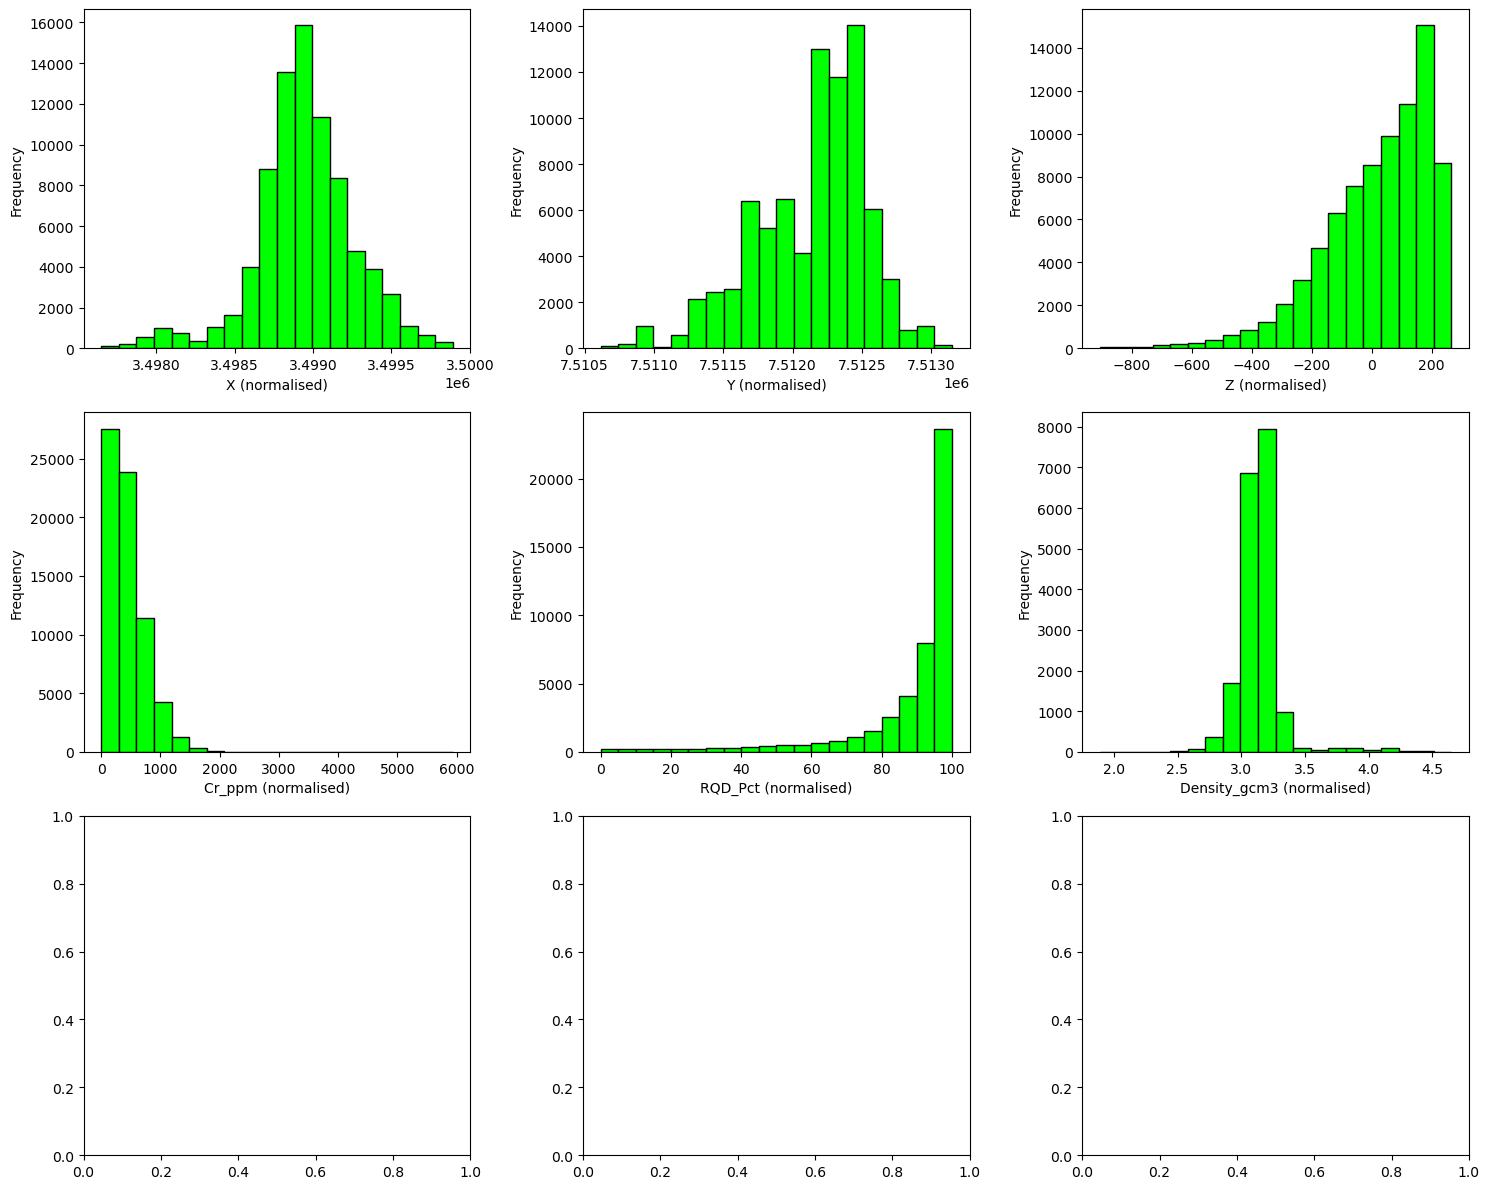

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

# List of variables
#variables = ['X', 'Y', 'Z', 'PY_Total', 'PO_Total', 'CP_Total', 'Cr_ppm', 'RQD_Pct', 'Density_gcm3']

variables = ['X', 'Y', 'Z', 'Cr_ppm', 'RQD_Pct', 'Density_gcm3']


# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Plot histograms for each variable
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axs[row, col].hist(deposit_data[var], bins=20, color='#00FF00', edgecolor='black')
    #axs[row, col].set_title('Histogram of ' + var)
    axs[row, col].set_xlabel(var+" (normalised)")
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].grid(False)

plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
import plotly.express as px


df = pd.DataFrame({
    'Density_gcm3': deposit_data['Density_gcm3'],
    'RQD_Pct': deposit_data['RQD_Pct'],
    'Cr_ppm': deposit_data['Cr_ppm'],
    'CP_Total': deposit_data['CP_Total'],
    'PO_Total': deposit_data['PO_Total'],
    'PY_Total': deposit_data['PY_Total']
})




fig = px.scatter_matrix(
    df,
    dimensions=['PY_Total', 'PO_Total', 'CP_Total', 'Cr_ppm', 'RQD_Pct', 'Density_gcm3'],
    color_continuous_scale='#FFD700'

    
)

fig.update_traces(diagonal_visible=False, showupperhalf=False) 
fig.update_layout(

    height=600,  
    width=900   
)

fig.show()


c:\Users\23478671\Anaconda3\envs\geostatistics\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:
import plotly.express as px

# Assuming your DataFrame containing these features is named df

# Create the scatterplot matrix
fig = px.scatter_matrix(
    df,
    dimensions=["Density_gcm3", "RQD_Pct", "Cr_ppm"],
    color=df["target_column"],  # Assuming you have a target column for coloring points
    symbol=df["target_column"],  # Assuming you want to differentiate points by a symbol
    title="Scatterplot Matrix of Density_gcm3, RQD_Pct, and Cr_ppm"
)

# Update layout
fig.update_traces(diagonal_visible=False)  # Hide histograms on the diagonal

# Show the plot
fig.show()


In [3]:
# Load and preprocess your data
data = pd.read_csv('../Curated_data/cluster_0_data.csv', low_memory=False)

(7508646.604, 7514935.876)

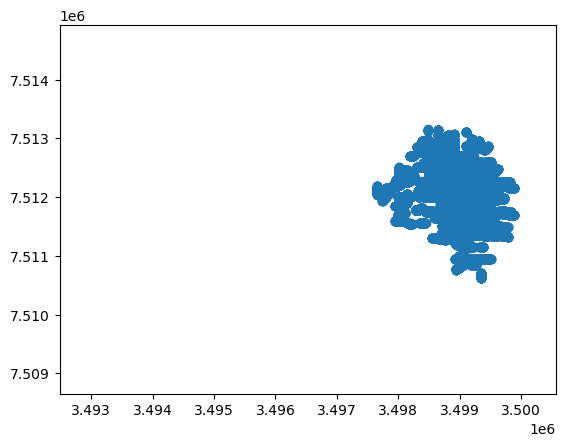

In [4]:
x = data['X']
y = data['Y']
plt.scatter(x,y)
plt.xlim((3492482.671, 3500563.909))
plt.ylim((7508646.604, 7514935.876))

# 1. Column filtering

In [5]:
for col in data:
    print(col)

Sample Number
Name
Depth From
Depth To
X
Y
Z
Length
Alt1_Code
Alt1_Int
Alt1_Style
Alt2_Code
Alt2_Int
Alt2_Style
Au_ppb
Comments
Core_Angle
Core_Diameter
CoreLoss_m
Cumulate
DataSet
Date_Logged
Density
Density_gcm3
Density_kgm3
Dest
Gamma_uRh
Gangue_Min
Interval_Length
Ir_ppb
Ja
Jn
Jr
Lith1_Code
Logged_By
Min1_Code
Min1_Pct
Min1_Style
Min2_Code
Min2_Pct
Min2_Style
Min3_Code
Min3_Pct
Min3_Style
Ore_Type
Ori_Confidence
Orig_Lith
Os_ppb
Pd_ppb
Proportion (Alt1_Code)
Proportion (Alt1_Int)
Proportion (Alt1_Style)
Proportion (Alt2_Code)
Proportion (Alt2_Int)
Proportion (Alt2_Style)
Proportion (Comments)
Proportion (DataSet)
Proportion (Date_Logged)
Proportion (Gangue_Min)
Proportion (Lith1_Code)
Proportion (Logged_By)
Proportion (Min1_Code)
Proportion (Min1_Style)
Proportion (Min2_Code)
Proportion (Min2_Style)
Proportion (Min3_Code)
Proportion (Min3_Style)
Proportion (Ore_Type)
Proportion (Ori_Confidence)
Proportion (Orig_Lith)
Proportion (samp_id)
Proportion (SampleID)
Proportion (Sulph1_Cod

## 1.1 Filter useless columns

First, filter for the columns that have severe problems, like too many NA's, or all same values.

Core Diameter: all NaNs <br>
Cumulate: all NaNs <br>
Dataset: all 0s  <br>
Recovery_m: all Nans <br>
Recovery_Pct: all Nans <br>
Re_ppm: all Nans <br>

Col numbers: 17, 19, 20, 86, 87, 143
Core Diameter, Cumulate, Dataset, Recovery_m, Recovery_pct, Re_ppm

In [6]:
# List of columns to exclude
columns_to_exclude = ["Core_Diameter", "Cumulate", "DataSet", "Recovery_m", "Recovery_Pct", "Re_ppm"]

# Drop the specified columns from the dataset
data = data.drop(columns=columns_to_exclude)

# Now, filtered_data contains all columns except the ones you wanted to exclude



# 1.2 Filter uninteresting variables 
Second, get rid of the columns that are not physical variables of interest

Sample Number <br>
Length <br>
CoreLoss_m <br>
Date_Logged <br>
Density <br>
Density_kgm3 <br>
Interval_Length <br>
Logged_By <br>
Ori_Confidence <br> 
samp_id <br>
SampleID <br>

Col numbers: 0, 7, 15, 16, 17, 19, 22, 27, 31, 65, 66  <br>
Sample_Number, Length, Core_Loss_m, Date_Logged, Density, Density_kgm3, Interval_Length, Logged_by, Ori_Confidence, samp_id, SampleID


In [7]:
# List of additional columns to exclude
additional_columns_to_exclude = ["Sample Number", "Length", "CoreLoss_m", "Date_Logged", "Density", "Density_kgm3", "Interval_Length", "Logged_By", "Ori_Confidence", "samp_id", "SampleID"]

# Drop the specified columns from the dataset
data = data.drop(columns=additional_columns_to_exclude)

# Now, filtered_data contains all columns except the ones you wanted to exclude


Filter all the ones with the word "Proportion", as they are also useless

In [8]:
data = data.filter(regex='^(?!.*Proportion).*$')


In [9]:
data

,Name,Depth From,Depth To,X,Y,Z,Alt1_Code,Alt1_Int,Alt1_Style,Alt2_Code,...,Te_ppm,Th_ppm,Ti_pct,Tl_ppm,U_ppm,V_ppm,W_ppm,Y_ppm,Zn_ppm,Zr_ppm
0,KEV_1,0.0,2.0,3498947.63,7511204.97,236.38,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KEV_1,2.0,4.0,3498948.84,7511204.92,234.79,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KEV_1,4.0,6.0,3498950.05,7511204.87,233.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KEV_1,6.0,8.0,3498951.26,7511204.82,231.61,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KEV_1,8.0,10.0,3498952.47,7511204.77,230.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81197,R319,242.0,244.0,3499086.36,7510950.00,89.91,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81198,R319,244.0,246.0,3499087.71,7510950.00,88.44,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81199,R319,246.0,248.0,3499089.07,7510950.00,86.97,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81200,R319,248.0,250.0,3499090.42,7510950.00,85.50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  1.3 Filter big proportion of missing values

The following code deletes columns that have over 95% missing values

In [10]:
# Calculate the percentage of NaN values in each column
nan_percentage = (data.isna().sum() / len(data)) * 100

# Define a threshold (99% in this case)
threshold = 90

# Get the column indices that have less than the threshold percentage of NaN values
columns_to_keep = nan_percentage[nan_percentage <= threshold].index

# Create a new DataFrame with only the selected columns
data = data[columns_to_keep]

# Now, filtered_data contains only columns with less than 99% NaN values


In [11]:
len(data.columns)

70

In [12]:

# Assuming 'data' is your DataFrame
# Create a copy of the original DataFrame to store the encoded data
encoded_data = data.copy()

# Define the threshold for one-hot encoding (e.g., 10 unique values)
threshold = 10

# Iterate through each column
for column in data.columns:
    # Check if the column is of object data type (categorical)
    if data[column].dtype == 'object':
        unique_values = data[column].nunique()
        
        # Check if the number of unique values is within the threshold
        if unique_values <= threshold:
            # Perform one-hot encoding for columns with unique values within the threshold
            encoded_columns = pd.get_dummies(encoded_data[column], prefix=column)
            encoded_columns = encoded_columns.astype(int)  # Convert to integers (0 or 1)
            encoded_data = pd.concat([encoded_data, encoded_columns], axis=1)
            encoded_data = encoded_data.drop(columns=[column])

# Now, 'encoded_data' contains the one-hot encoded columns within the specified threshold, with 0s and 1s.


In [13]:
data = encoded_data

## 1.3 Filter for correlation

In [14]:

def filter_numeric_columns(data):
    # Select only columns with numeric data types (int or float)
    numeric_columns = data.select_dtypes(include=['number'])
    
    return numeric_columns



# Filter non-numeric columns
filtered_data = filter_numeric_columns(data)




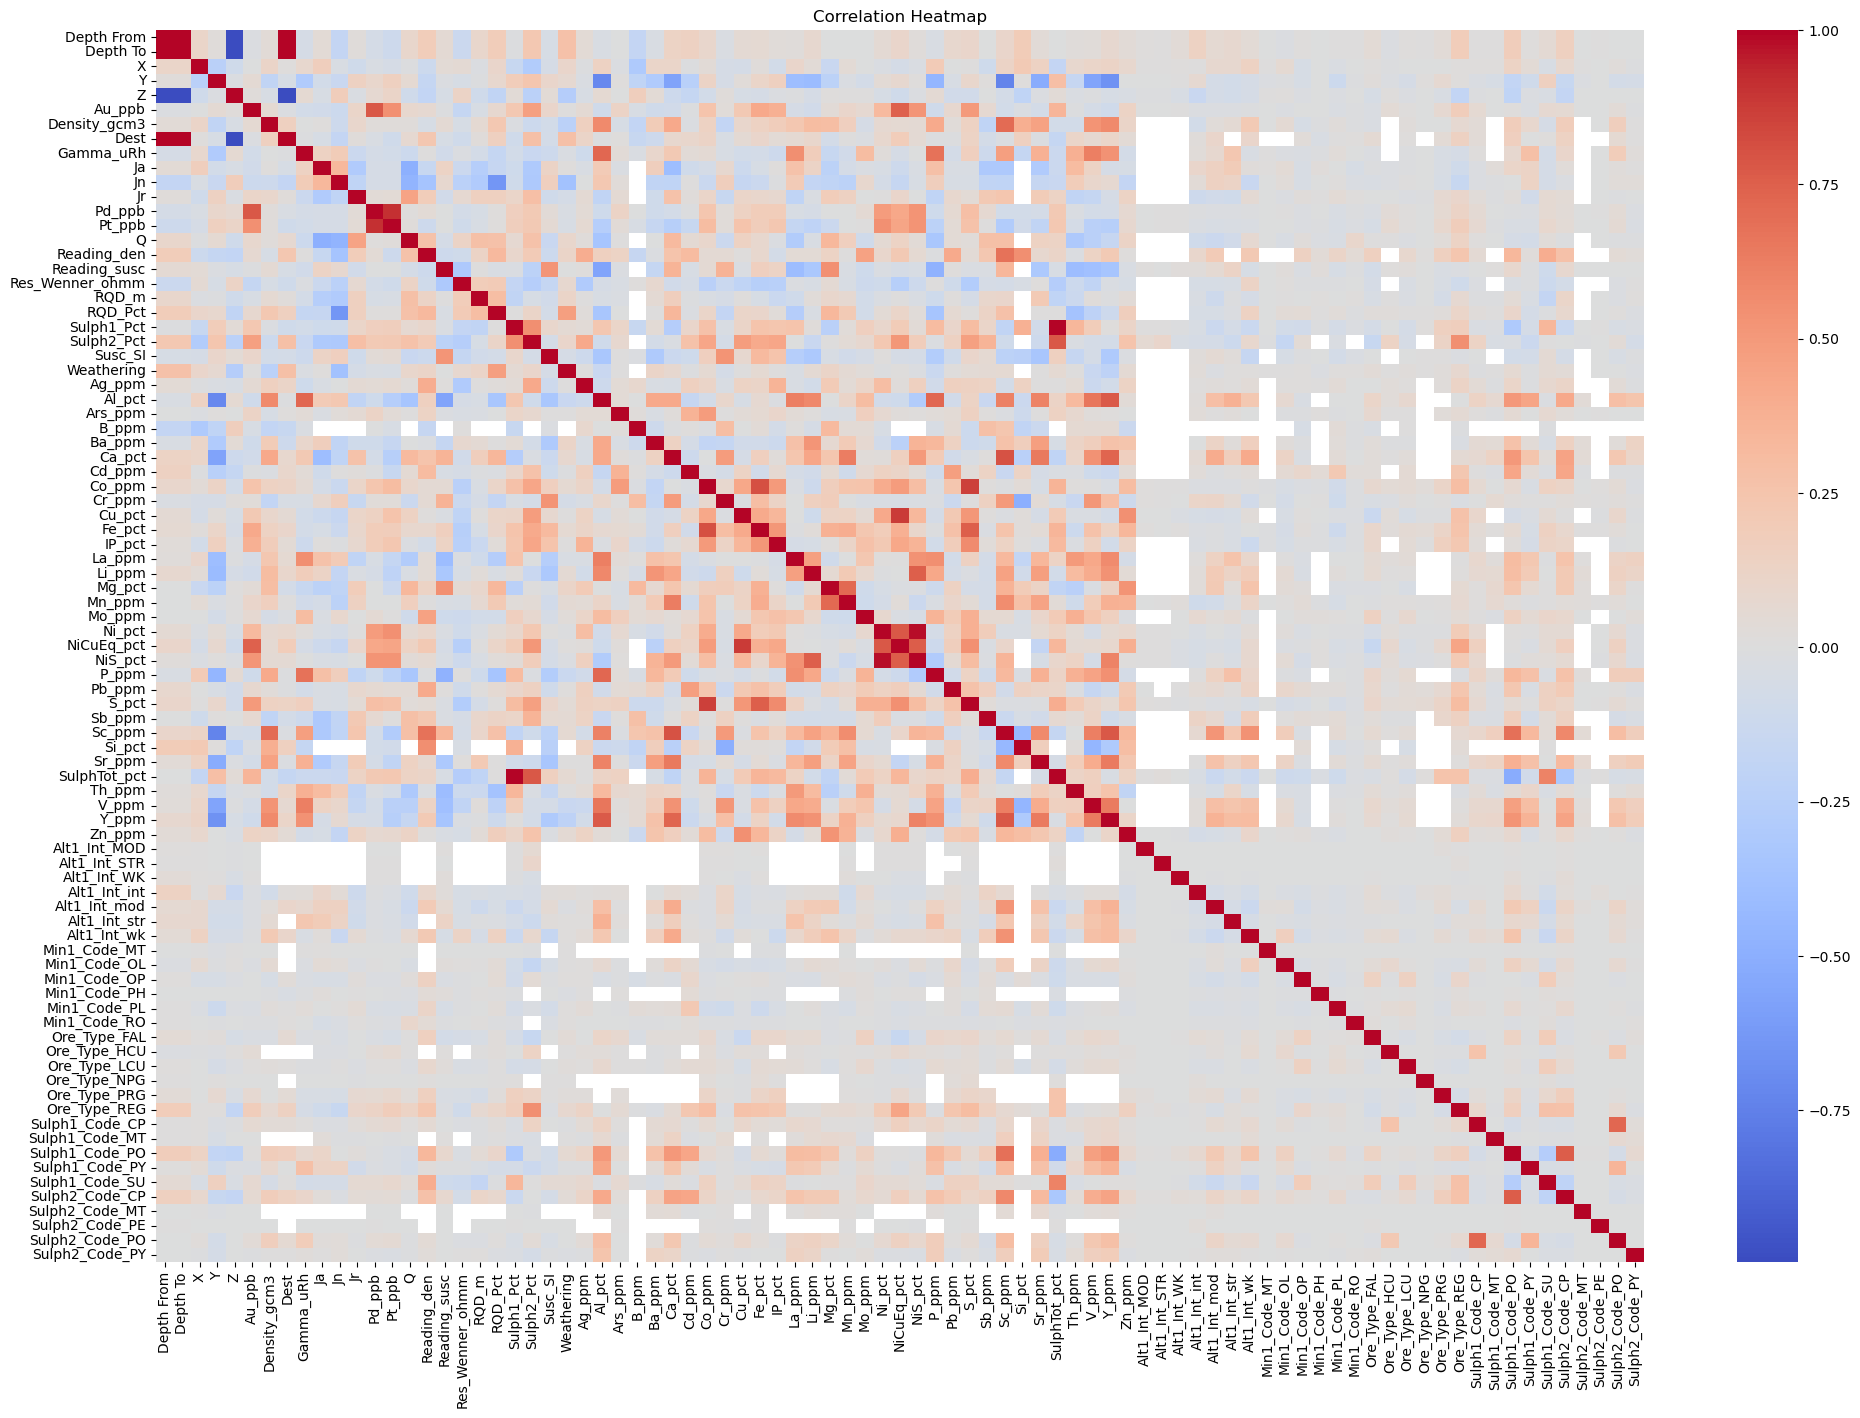

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Create a heatmap without displaying numeric values inside the cells
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


## 1.4 Filtering variables with small correlation to variables of interest

Our variables of interest are the elements + density (so no physical variables such as mag susc, etc) that have less than 80% missing values 

In [16]:
encoded_data = filtered_data

In [17]:
# Identify the encoded columns based on the common pattern
encoded_columns = [col for col in encoded_data.columns if '_Code_' in col and 'Sulph' in col]

# List to store the total columns
total_columns = []

# Iterate through the encoded columns and calculate the total for each category
for col in encoded_columns:
    # Extract the prefix and original column name
    prefix, original_column = col.split('_Code_')
    
    # Calculate the total for the category
    total_column = f"{original_column}_Total"
    total_columns.append(total_column)
    
    # Multiply the code column by the corresponding percentage column and sum them
    encoded_data[total_column] = (
        encoded_data[f"{prefix}_Code_{original_column}"] * encoded_data[f"{prefix}_Pct"]
    )

In [18]:
# List to store the total columns
total_columns = []

# Initialize a dictionary to accumulate totals for each category
category_totals = {}

# Iterate through the encoded columns and calculate the total for each category
for col in encoded_columns:
    # Extract the prefix and original column name
    prefix, original_column = col.split('_Code_')
    
    # Calculate the total for the category
    total_column = f"{original_column}_Total"
    if total_column not in total_columns:
        total_columns.append(total_column)
    
    # Multiply the code column by the corresponding percentage column
    total_values = encoded_data[f"{prefix}_Code_{original_column}"] * encoded_data[f"{prefix}_Pct"]
    
    # Accumulate the totals for each category
    if total_column in category_totals:
        category_totals[total_column] += total_values
    else:
        category_totals[total_column] = total_values

# Add accumulated totals to the DataFrame
for total_column, total_values in category_totals.items():
    encoded_data[total_column] = total_values


In [19]:
filtered_data = encoded_data

In [20]:
# import re

# # Create a regex pattern to match variable names with "pct," "ppm," or "ppb"
# pattern = re.compile(r'.*(pct|ppm|ppb).*')

# # Create a list of variables that match the pattern
# variables_matching_pattern = [column for column in filtered_data.columns if pattern.search(column)]

# # Filter the data for the variables matching the pattern
# variables_of_interest = filtered_data[variables_matching_pattern]

# # Now, filtered_data contains only the variables that match the specified pattern


In [21]:
# # Define the threshold for missing values (80% in this case)
# threshold = 80

# # Calculate the percentage of missing values in each column
# missing_percentage = (variables_of_interest.isnull().sum() / len(variables_of_interest)) * 100

# # Get the column indices that have less than or equal to the threshold percentage of missing values
# columns_to_keep = missing_percentage[missing_percentage <= threshold].index

# # Create a new DataFrame with only the selected columns
# variables_of_interest = variables_of_interest[columns_to_keep]

# # Now, filtered_data contains only the variables with less than or equal to 80% missing values


In [22]:
# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Define the threshold correlation value (absolute value)
threshold = 0.1

# Initialize the list of variables of interest with "Density_gcm3"
variables_of_interest = ['Density_gcm3']

# Create a list to store the variables that should be kept
variables_to_keep = ["X", "Y", "Z", 'Density_gcm3']

# Create a list to store the variables to remove
variables_to_remove = []

# Iterate through the columns and check the correlation with variables of interest
for column in corr_matrix.columns:
    if column in variables_of_interest:
        other_variables = [var for var in variables_of_interest if var != column]
        # Check if the minimum absolute correlation with the other variables of interest is smaller than the threshold
        if abs(corr_matrix[column][other_variables]).max() < threshold:
            variables_to_remove.append(column)
    else:
        # Check if the minimum absolute correlation with the variables of interest is smaller than the threshold
        if abs(corr_matrix[column][variables_of_interest]).max() < threshold:
            variables_to_remove.append(column)


#variables_to_remove.append("Alt1_Int_tr")

# Drop the variables with correlation (absolute value) smaller than the threshold
remaining_data = filtered_data.drop(columns=variables_to_remove)

# Add the variables to keep back to the remaining_data
remaining_data[variables_to_keep] = filtered_data[variables_to_keep]


In [23]:
# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Define the threshold correlation value (absolute value)
threshold = 0.169

# Initialize the list of variables of interest with "Density_gcm3"
variables_of_interest = ['Density_gcm3']

# Create a list to store the variables that should be kept
variables_to_keep = ["X", "Y", "Z", 'Density_gcm3','CP_Total', 'PO_Total', 'PY_Total']

# Create a list to store the variables to remove
variables_to_remove = []

# Iterate through the columns and check the correlation with variables of interest
for column in corr_matrix.columns:
    if abs(corr_matrix[column][variables_of_interest].min()) <= threshold or corr_matrix[column][variables_of_interest].isna().any():
        variables_to_remove.append(column)

# Drop the variables with correlation (absolute value) greater than or equal to the threshold
remaining_data = filtered_data.drop(columns=variables_to_remove)

# Add the variables to keep back to the remaining_data
remaining_data[variables_to_keep] = filtered_data[variables_to_keep]


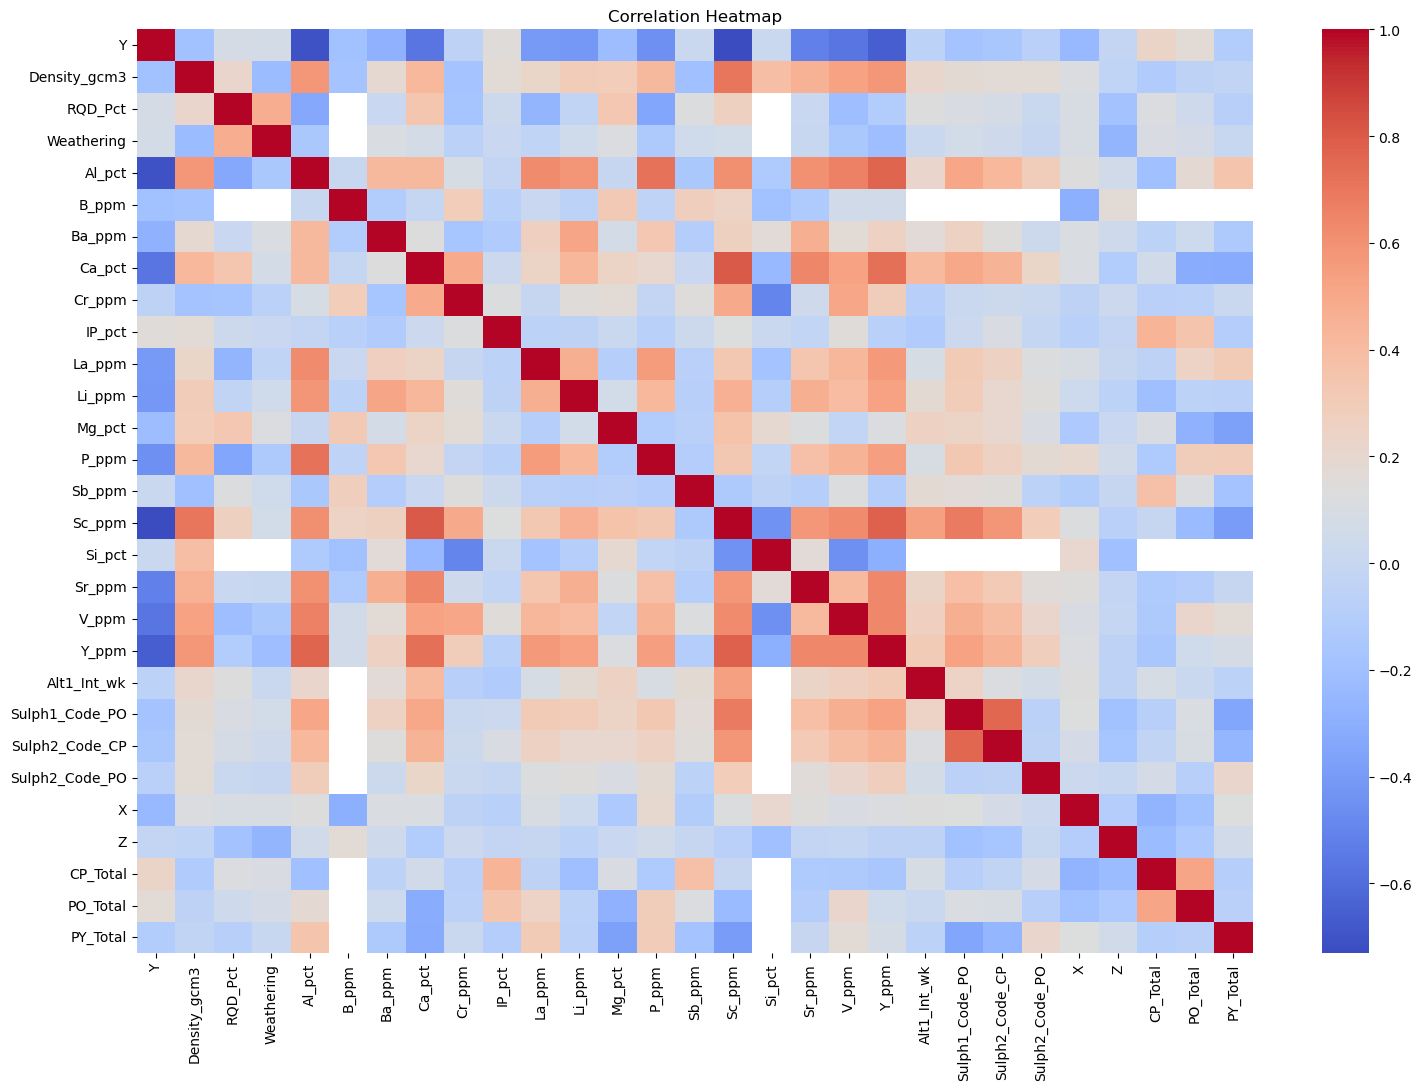

In [24]:
# Calculate the correlation matrix
corr_matrix = remaining_data.corr()

# Create a heatmap without displaying numeric values inside the cells
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

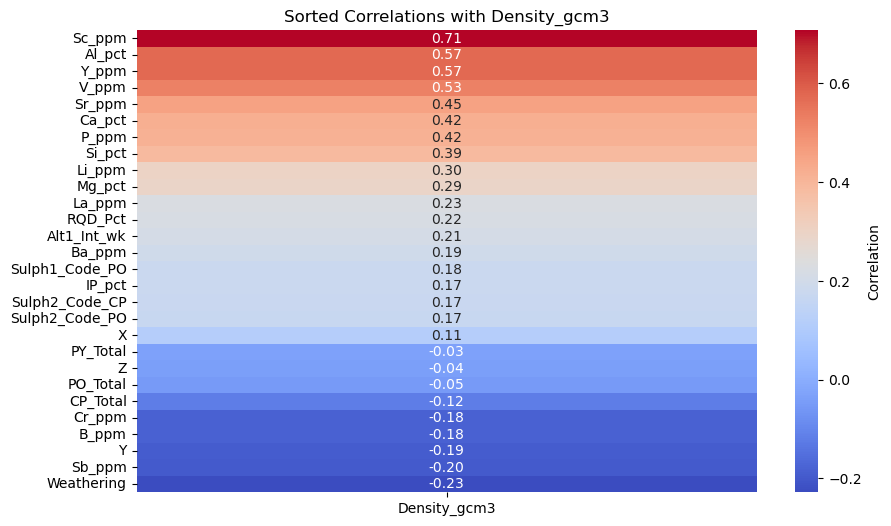

In [25]:
import seaborn as sns

# Specify the target variable for correlation
target_variable = 'Density_gcm3'

# Filter the correlation matrix to include only correlations with 'Density_gcm3'
density_correlations = corr_matrix[[target_variable]].drop(index=target_variable)

# Sort the correlations in descending order
sorted_density_correlations = density_correlations[target_variable].sort_values(ascending=False)

# Create a heatmap for sorted density correlations
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_density_correlations.to_frame(), cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title(f'Sorted Correlations with {target_variable}')
plt.show()


In [35]:
variable_names = sorted_density_correlations.index.tolist()

In [39]:
variable_names

['Sc_ppm',
 'Al_pct',
 'Y_ppm',
 'V_ppm',
 'Sr_ppm',
 'Ca_pct',
 'P_ppm',
 'Si_pct',
 'Li_ppm',
 'Mg_pct',
 'La_ppm',
 'RQD_Pct',
 'Alt1_Int_wk',
 'Ba_ppm',
 'Sulph1_Code_PO',
 'IP_pct',
 'Sulph2_Code_CP',
 'Sulph2_Code_PO',
 'X',
 'PY_Total',
 'Z',
 'PO_Total',
 'CP_Total',
 'Cr_ppm',
 'B_ppm',
 'Y',
 'Sb_ppm',
 'Weathering']

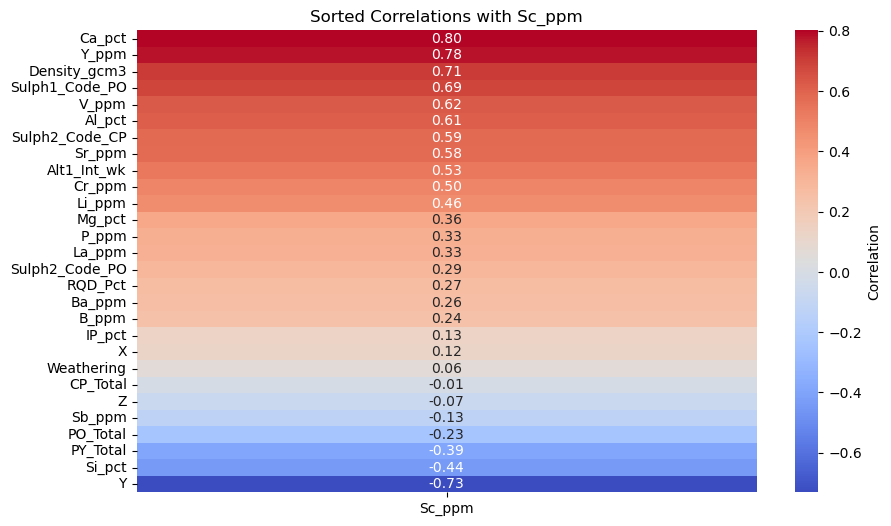

In [ ]:
import seaborn as sns

# Specify the target variable for correlation
target_variable = 'Sc_ppm'

# Filter the correlation matrix to include only correlations with 'Density_gcm3'
density_correlations = corr_matrix[[target_variable]].drop(index=target_variable)

# Sort the correlations in descending order
sorted_density_correlations = density_correlations[target_variable].sort_values(ascending=False)

# Create a heatmap for sorted density correlations
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_density_correlations.to_frame(), cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title(f'Sorted Correlations with {target_variable}')
plt.show()


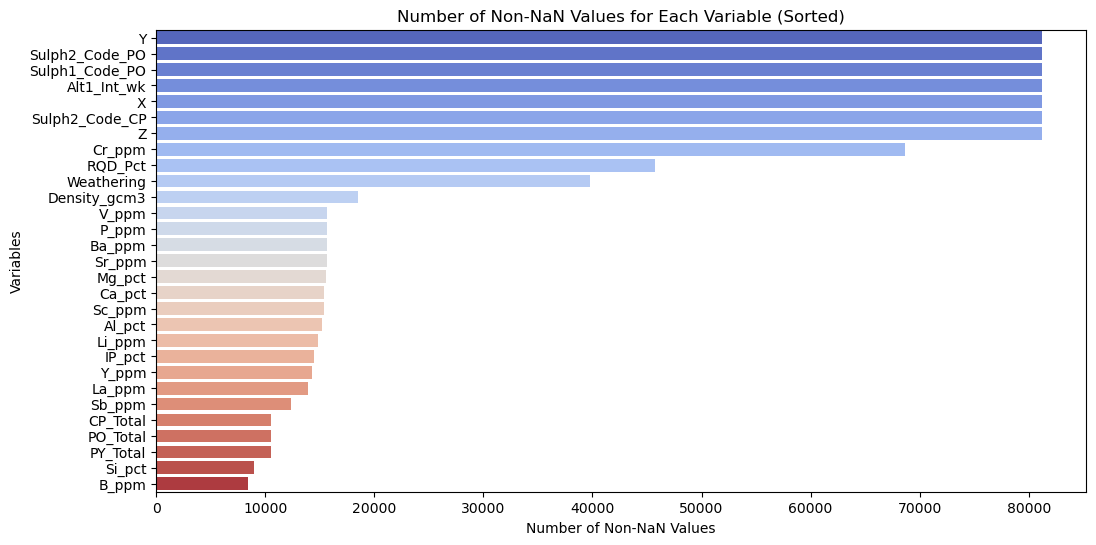

In [ ]:
import seaborn as sns

# Count non-NaN values for each variable and sort in descending order
non_na_counts_sorted = remaining_data.count().sort_values(ascending=False)

# Create a sorted bar plot for non-NaN counts
plt.figure(figsize=(12, 6))
sns.barplot(x=non_na_counts_sorted.values, y=non_na_counts_sorted.index, palette='coolwarm')
plt.xlabel('Number of Non-NaN Values')
plt.ylabel('Variables')
plt.title('Number of Non-NaN Values for Each Variable (Sorted)')
plt.show()


In [ ]:
remaining_data['Name'] = data['Name']


In [ ]:
# Assuming 'remaining_data' is your DataFrame and 'output_file.csv' is the desired file name
remaining_data.to_csv('density_predictors.csv', index=False)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming 'pc_df' contains the principal components obtained from PCA
# Use the first 7 principal components
input_features = pc_df.iloc[:, :7].values

# Assuming 'your_target_variable' is the target variable you want to predict
target_variable = remaining_data['Density_gcm3'].values.reshape(-1, 1)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, target_variable, test_size=0.2, random_state=42)

# Convert to torch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the neural network architecture
class SimpleNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model
input_size = 7  # Number of principal components used
model = SimpleNet(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(x_test)
    mse_test = mean_squared_error(y_test.numpy(), test_predictions.numpy())
    print(f'Mean Squared Error on Test Set: {mse_test:.4f}')


NameError: name 'pc_df' is not defined

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Preprocess your data, including handling missing values and normalization

# Define the architecture of the autoencoder
input_dim = X_normalized.shape[1]  # Number of input features
encoding_dim = 10  # You can adjust this for dimensionality reduction

autoencoder = keras.models.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(encoding_dim, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(input_dim)
])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=32, validation_split=0.2)

# Extract feature importance from the bottleneck layer
encoder_layer = autoencoder.layers[3]  # Choose the bottleneck layer
encoded_X = encoder_layer.predict(X)

# You can analyze the encoded_X to identify important features


ModuleNotFoundError: No module named 'tensorflow'